# Regression on Used Bike Prices - A Machine Learning Approach

### NAME : KANMANI A

### Overview of Problem Statement

🏍️The resale market for two-wheelers is growing rapidly, with customers looking for affordable, reliable, and fuel-efficient bikes. However, pricing a used bike fairly is challenging because it depends on multiple factors like age, kilometers driven, engine capacity, brand reputation, and ownership history.

### Objectives

The objective of this project is to analyze, clean, and transform raw used bike sales data into a structured, insightful, and modeling-ready dataset in order to understand the factors that significantly influence the resale value of two-wheelers.Here factors which have the strongest impact on bike resale price is determined.It identifies high-value brands/models that retain resale value.finally it provides evidence-based recommendations to sellers and buyers for fair pricing.

### Data Description

#### Features

- **model_name** – Full name of the bike model (e.g., Royal Enfield Classic 350).

- **model_year** – Manufacturing year of the bike.

- **kms_driven** – Kilometers driven (usage measure).

- **owner** – Ownership category (first, second, third owner, etc.).

- **location** – City/region of sale.

- **mileage** – Fuel efficiency (often as text, e.g., 45 kmpl).

- **power** – Power of the bike (e.g., 12 bhp).

- **brand** – Brand/manufacturer of the bike (e.g., Honda, Yamaha).

- **price (target variable)** – Resale price of the bike.

In [180]:
#importing all essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor ,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

## 1. Data Collection and Preparation

### Loading the DataSet

In [227]:
data = pd.read_csv(r'C:\Users\netha\Used Bike Prices - Feature Engineering and EDA\bikes.csv', encoding='ISO-8859-1')

In [228]:
data

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


## Converting data into DataFrame

In [229]:
df=pd.DataFrame(data)

In [230]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000


In [185]:
df.head(10)   #details of top 10 row

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500
5,KTM Duke 200cc 2012,2012,24561 Km,third owner,bangalore,\n\n 35 kmpl,25 bhp,63400
6,Bajaj Pulsar 180cc 2016,2016,19718 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,55000
7,TVS Apache RTR 200 4V Dual Channel ABS BS6 2020,2020,Mileage 40 Kmpl,first owner,hyderabad,\n\n 40 Kmpl,20.21 bhp,120000
8,KTM Duke 390cc 2018,2018,1350 Km,first owner,jaipur,\n\n 25 kmpl,42.90 bhp,198000
9,Yamaha FZ16 150cc 2014,2014,Mileage 58 Kmpl,first owner,bangalore,\n\n 58 Kmpl,13 bhp,40000


In [186]:
df.tail(10)  #details of last 10 row

,model_name,model_year,kms_driven,owner,location,mileage,power,price
7847,Royal Enfield Classic 350cc 2016,2016,23000 Km,first owner,delhi,\n\n 35 kmpl,19.80 bhp,120000
7848,Hero Splendor 100cc 2001,2001,32000 Km,first owner,bharuch,\n\n 45 kmpl,7.44bhp,18500
7849,Hero Karizma ZMR 223cc 2011,2011,66780 Km,first owner,alipore,\n\n 48 kmpl,20 bhp,39899
7850,TVS Apache RTR 160 4V Carburetor With Rear Dis...,2018,16510 Km,first owner,ahmedabad,\n\n,16.10 bhp,60000
7851,Bajaj Pulsar RS200 ABS 2015,2015,Mileage 35 Kmpl,first owner,sidlaghatta,\n\n 35 Kmpl,24.16 bhp,80000
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000
7856,Bajaj Pulsar 220cc 2016,2016,15000 Km,first owner,chennai,\n\n 38 kmpl,21 bhp,65000


### Displaying information

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   model_name  7857 non-null   object
 1   model_year  7857 non-null   int64 
 2   kms_driven  7857 non-null   object
 3   owner       7857 non-null   object
 4   location    7838 non-null   object
 5   mileage     7846 non-null   object
 6   power       7826 non-null   object
 7   price       7857 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 491.2+ KB


### Checking shape of data

In [188]:
df.shape

(7857, 8)

### Describing the details of the dataset

In [189]:
df.describe()

,model_year,price
count,7857.000000,7.857000e+03
mean,2015.367698,1.067913e+05
std,4.001443,1.389261e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


### Displaying columns

In [190]:
df.columns

Index(['model_name', 'model_year', 'kms_driven', 'owner', 'location',
       'mileage', 'power', 'price'],
      dtype='object')

### Checking Datatypes

In [191]:
df.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

In [192]:
print(df['price'].dtype)

int64


## Data Cleaning and Preprocessing

### Checking for Duplicates

In [193]:
df.duplicated() 

0       False
1       False
2       False
3       False
4       False
        ...  
7852    False
7853    False
7854    False
7855    False
7856    False
Length: 7857, dtype: bool

In [194]:
df.duplicated().sum()

np.int64(0)

**No duplicate values found in the Dataset**

#### Finding and Handling null values

In [231]:
df.isnull().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price          0
dtype: int64

In [232]:
df['location'].fillna('Unknown', inplace=True)

In [233]:
df['mileage'] = df['mileage'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

In [234]:
df['power'] = df['power'].astype(str).str.strip().str.replace(r'\s+', ' ', regex=True)

In [235]:
df.isnull().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64

**Null values are found and resolved**

In [236]:
df.isna().sum()

model_name    0
model_year    0
kms_driven    0
owner         0
location      0
mileage       0
power         0
price         0
dtype: int64

### Finding unique values in a particular column

In [201]:
df['owner'].unique()

array(['first owner', 'third owner', 'second owner',
       'fourth owner or more'], dtype=object)

### Filtering the values of a column

In [202]:
filtered_df=df[df['owner']=='third owner']

In [203]:
filtered_df

,model_name,model_year,kms_driven,owner,location,mileage,power,price
5,KTM Duke 200cc 2012,2012,24561 Km,third owner,bangalore,35 kmpl,25 bhp,63400
15,Bajaj Pulsar NS200 2018,2018,Mileage 42 Kmpl,third owner,delhi,42 Kmpl,23.20 bhp,53000
176,Bajaj Pulsar NS200 2018,2018,Mileage 42 Kmpl,third owner,delhi,42 Kmpl,23.20 bhp,56000
409,Royal Enfieldâ Bullet 350cc 1997,1997,45000 Km,third owner,ludhiana,37 kmpl,19.80 bhp,90000
481,Bajaj Pulsar 220F 2018,2018,62000 Km,third owner,pali,38 kmpl,21 bhp,59000
...,...,...,...,...,...,...,...,...
7316,Royal Enfield Bullet Electra Twinspark 350cc 2015,2015,23399 Km,third owner,palwal,35 kmpl,19.8 bhp,85000
7347,Royal Enfield Thunderbird 500cc 2015,2015,11976 Km,third owner,bangalore,25 kmpl,27.20 bhp,119000
7374,Yamaha YZF-R15 150cc 2011,2011,47913 Km,third owner,delhi,42 kmpl,16 bhp,43000
7433,Honda CB Shine 125cc 2004,2004,Mileage 65 Kmpl,third owner,mumbai,65 Kmpl,10 bhp,27000


### Sorting

In [204]:
sort_s=df.sort_values(by='mileage')

In [205]:
sort_s

,model_name,model_year,kms_driven,owner,location,mileage,power,price
5084,Honda X-Blade 160cc 2018,2018,8700 Km,first owner,bangalore,,13.93 bhp,80000
2264,Bajaj Pulsar NS160 2019,2019,25000 Km,first owner,bhopal,,15.5 PS,90000
3882,TVS Apache RTR 160 4V DISC ABS BS6 2020,2020,9100 Km,first owner,gautam buddha nagar,,15.6 bhp,100000
1281,Royal Enfield Thunderbird X 350cc 2019,2019,3700 Km,first owner,delhi,,19.80 bhp,144500
4749,Royal Enfield Interceptor 650cc 2019,2019,10000 Km,first owner,mumbai,,47 bhp,260000
...,...,...,...,...,...,...,...,...
2277,KTM Duke 200cc 2012,2012,30000 Km,first owner,bangalore,nan,"25 bhp @ 10,000 rpm",85000
7394,Yamaha YZF-R15 2.0 150cc 2015,2015,18000 Km,second owner,delhi,nan,"16.70 bhp @ 8,500 rpm",62000
1640,Kawasaki Ninja 650cc 2020,2020,8000 Km,second owner,delhi,nan,"66.4 bhp @ 8,000 rpm",520000
4646,Hero Passion Pro 100cc 2014,2014,16834 Km,first owner,chandigarh,nan,8.2 Bhp @ 8000 rpm,40000


### Grouping and finding the mean value

In [206]:
grouped_df=df.groupby('owner')['price'].mean()

grouped_df

### Statistical Analysis

In [207]:
mean_price=df['price'].mean()   #average price
mean_price

np.float64(106791.33689703449)

In [208]:
median_price=df['price'].median()    #middle value of price
median_price

np.float64(75000.0)

**the mean and  median price of bikes are shown here**

As Its a Imbalanced dataset ,to balance it initially, EDA process is done.

## EDA - Exploratory Data Analysis (EDA)

### Univariate Analysis

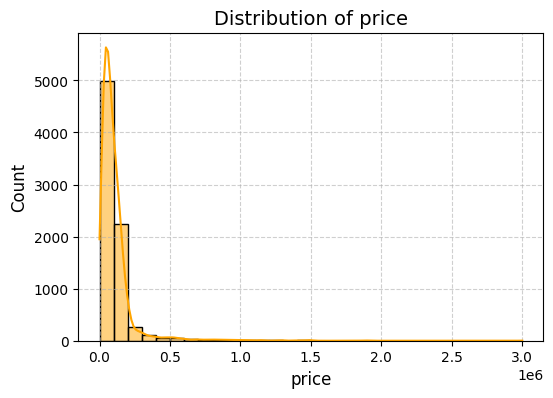

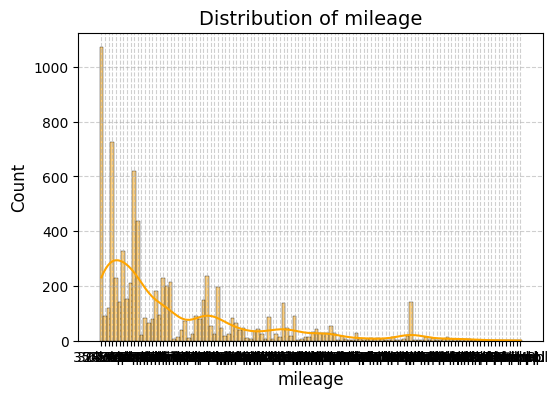

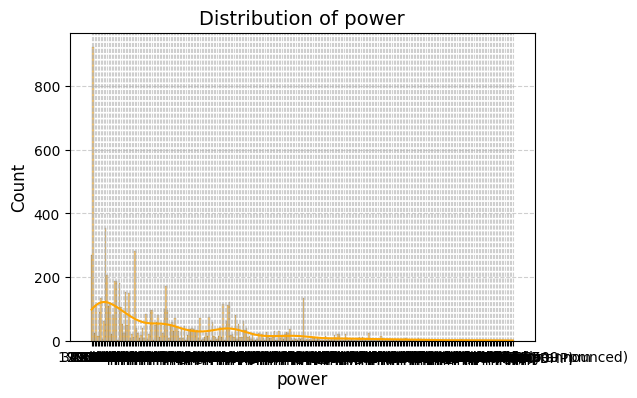

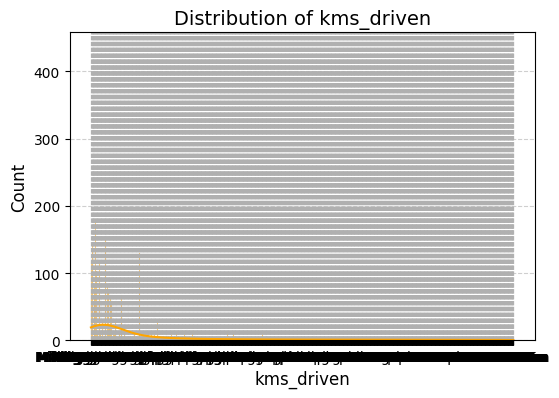

In [209]:
# List of continuous variables
continuous_features = ['price', 'mileage', 'power', 'kms_driven']

for col in continuous_features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='Orange')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

 Insights
- Price : Strong right skew (most bikes affordable, luxury bikes rare).

- Mileage : Cluster around 40–60 kmpl.

- Power : Peaks near 10–20 bhp.

- Kms Driven : Heavy skew; most under 50,000 km, few extreme outliers.

### Bivariate Analysis

#### Price vs Model Year

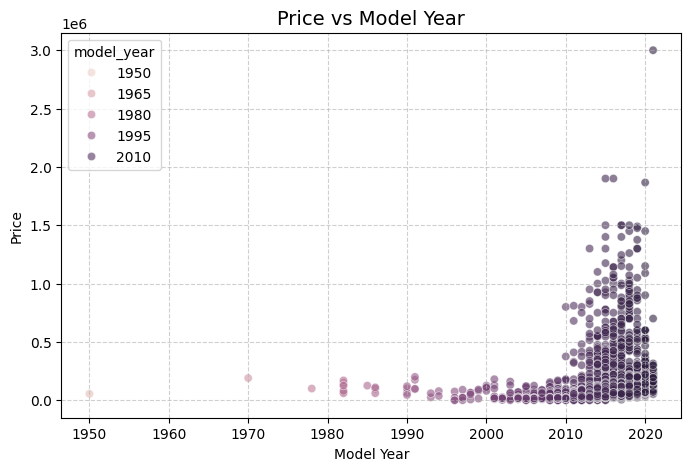

In [210]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='model_year', y='price', data=df,  hue='model_year', alpha=0.6)
plt.title("Price vs Model Year", fontsize=14)
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

**Some outliers (classic/vintage bikes may be expensive despite older year).**

#### Price vs Kilometers Driven

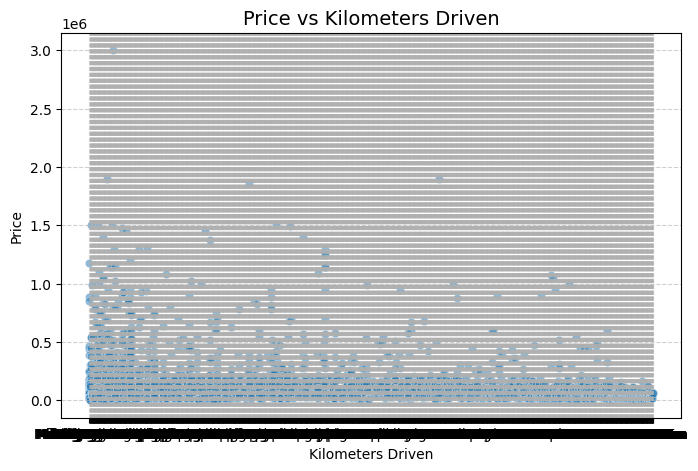

In [211]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='kms_driven', y='price', data=df, alpha=0.5)
plt.title("Price vs Kilometers Driven", fontsize=14)
plt.xlabel("Kilometers Driven")
plt.ylabel("Price")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

### Correlation

In [237]:
df['kms_driven'] = df['kms_driven'].astype(str).str.strip()
df['kms_driven'] = df['kms_driven'].str.replace(r'[^0-9]', '', regex=True)
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')

In [238]:
df['mileage'] = df['mileage'].astype(str).str.strip()
df['mileage'] = df['mileage'].str.extract(r'(\d+\.?\d*)')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')
# Fill missing with brand-wise median
df['mileage'] = df.groupby('owner')['mileage'].transform(lambda x: x.fillna(x.median()))
# Fallback global median
df['mileage'].fillna(df['mileage'].median(), inplace=True)

In [239]:
df['power'] = df['power'].astype(str).str.strip()
df['power'] = df['power'].str.extract(r'(\d+\.?\d*)')
df['power'] = pd.to_numeric(df['power'], errors='coerce')
df['power'] = df.groupby('owner')['power'].transform(lambda x: x.fillna(x.median()))
df['power'].fillna(df['power'].median(), inplace=True)

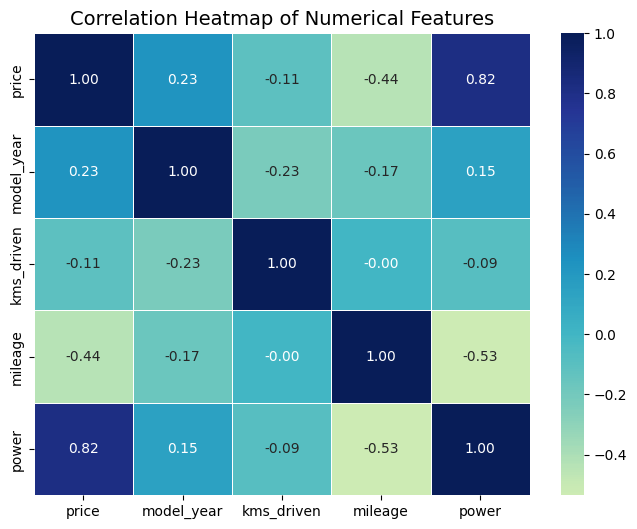

In [240]:
# Select only numerical columns
num_df = df[['price', 'model_year', 'kms_driven', 'mileage', 'power']]

plt.figure(figsize=(8,6))
corr = num_df.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='YlGnBu', center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

### Observations

- **Price - Model Year :**	+0.55 ~ +0.7	Newer bikes tend to have higher prices.
- **Price - Kms Driven :** 0.4 ~ -0.6	More kilometers → lower resale price.
- **Price - Mileage :**	Slight positive or neutral	Bikes with higher fuel efficiency may have slightly higher price, but weak correlation.
- **Price - Power:**	+0.6 ~ +0.7	Higher-powered bikes are more expensive.
- **Mileage - Power:** 0.5 ~ -0.6	More powerful bikes usually have lower fuel efficiency.
- **Kms Driven - Age (Model Year):** -0.3 ~ -0.5	Older bikes tend to have higher kms driven.

## Feature Engineering

### Creating New Features

In [241]:
# Current year
current_year = datetime.now().year

# Calculate age
df['bike_age'] = current_year - df['model_year']

# Optional: handle future model_year (if any data error)
df['bike_age'] = df['bike_age'].apply(lambda x: x if x >= 0 else 0)

In [242]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price,bike_age
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500,8
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000,9
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000,13
3,Bajaj Dominar 400 ABS 2017,2017,28.0,first owner,pondicherry,28.0,34.5,100000,8
4,Jawa Perak 330cc 2020,2020,2000.0,first owner,bangalore,40.0,30.0,197500,5
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000.0,first owner,agra,42.0,16.0,55000,14
7853,Bajaj Discover 100cc 2015,2015,80.0,first owner,delhi,80.0,7.7,28000,10
7854,Bajaj Pulsar 180cc 2016,2016,6407.0,first owner,bangalore,65.0,17.0,61740,9
7855,Bajaj V15 150cc 2016,2016,7524.0,first owner,bangalore,57.0,11.8,49000,9


#### Label Encoding (ordinal numeric mapping)

In [243]:
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])

In [244]:
df

,model_name,model_year,kms_driven,owner,location,mileage,power,price,bike_age
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,238,35.0,19.0,63500,8
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,238,35.0,19.8,115000,9
2,Hyosung GT250R 2012,2012,14795.0,first owner,238,30.0,28.0,300000,13
3,Bajaj Dominar 400 ABS 2017,2017,28.0,first owner,428,28.0,34.5,100000,8
4,Jawa Perak 330cc 2020,2020,2000.0,first owner,62,40.0,30.0,197500,5
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000.0,first owner,8,42.0,16.0,55000,14
7853,Bajaj Discover 100cc 2015,2015,80.0,first owner,157,80.0,7.7,28000,10
7854,Bajaj Pulsar 180cc 2016,2016,6407.0,first owner,62,65.0,17.0,61740,9
7855,Bajaj V15 150cc 2016,2016,7524.0,first owner,62,57.0,11.8,49000,9


### Onehot encoding

In [245]:
categorical_cols = ['owner']
ohe = OneHotEncoder(sparse_output=False, drop=None)  # use sparse=False if sklearn < 1.2
encoded_array = ohe.fit_transform(df[categorical_cols])
encoded_cols = ohe.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)
df_encoded

,owner_first owner,owner_fourth owner or more,owner_second owner,owner_third owner
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
7852,1.0,0.0,0.0,0.0
7853,1.0,0.0,0.0,0.0
7854,1.0,0.0,0.0,0.0
7855,1.0,0.0,0.0,0.0


In [246]:
df_final = pd.concat([df.drop(columns=categorical_cols), df_encoded], axis=1)
df_final.head()

,model_name,model_year,kms_driven,location,mileage,power,price,bike_age,owner_first owner,owner_fourth owner or more,owner_second owner,owner_third owner
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,238,35.0,19.0,63500,8,1.0,0.0,0.0,0.0
1,Royal Enfield Classic 350cc 2016,2016,50000.0,238,35.0,19.8,115000,9,1.0,0.0,0.0,0.0
2,Hyosung GT250R 2012,2012,14795.0,238,30.0,28.0,300000,13,1.0,0.0,0.0,0.0
3,Bajaj Dominar 400 ABS 2017,2017,28.0,428,28.0,34.5,100000,8,1.0,0.0,0.0,0.0
4,Jawa Perak 330cc 2020,2020,2000.0,62,40.0,30.0,197500,5,1.0,0.0,0.0,0.0


In [293]:
df_final.to_csv("balanced dataset.csv",index=False)

### Feature Transformation

#### Log-transform

In [250]:
df['log_price'] = np.log1p(df['price'])          # price
df['log_kms_driven'] = np.log1p(df['kms_driven'])  # kilometers driven

# log-transform other right-skewed features
df['log_power'] = np.log1p(df['power'])

#### Scaling

In [247]:
scaler = StandardScaler()
num_features = ['mileage', 'power', 'bike_age', 'power']

df[num_features] = scaler.fit_transform(df[num_features])

#### Binning

In [248]:
df['age_bin'] = pd.cut(df['bike_age'], bins=[0,3,6,10,100], labels=['0-3','4-6','7-10','10+'])

**After Feature Transformation, the dataset is model-ready, with: Reduced skewness , scaled numeric features , e ncoded categorical variables , additional derived features**

### Data Visualization

#### Multivariate Plots

#### Pairplot

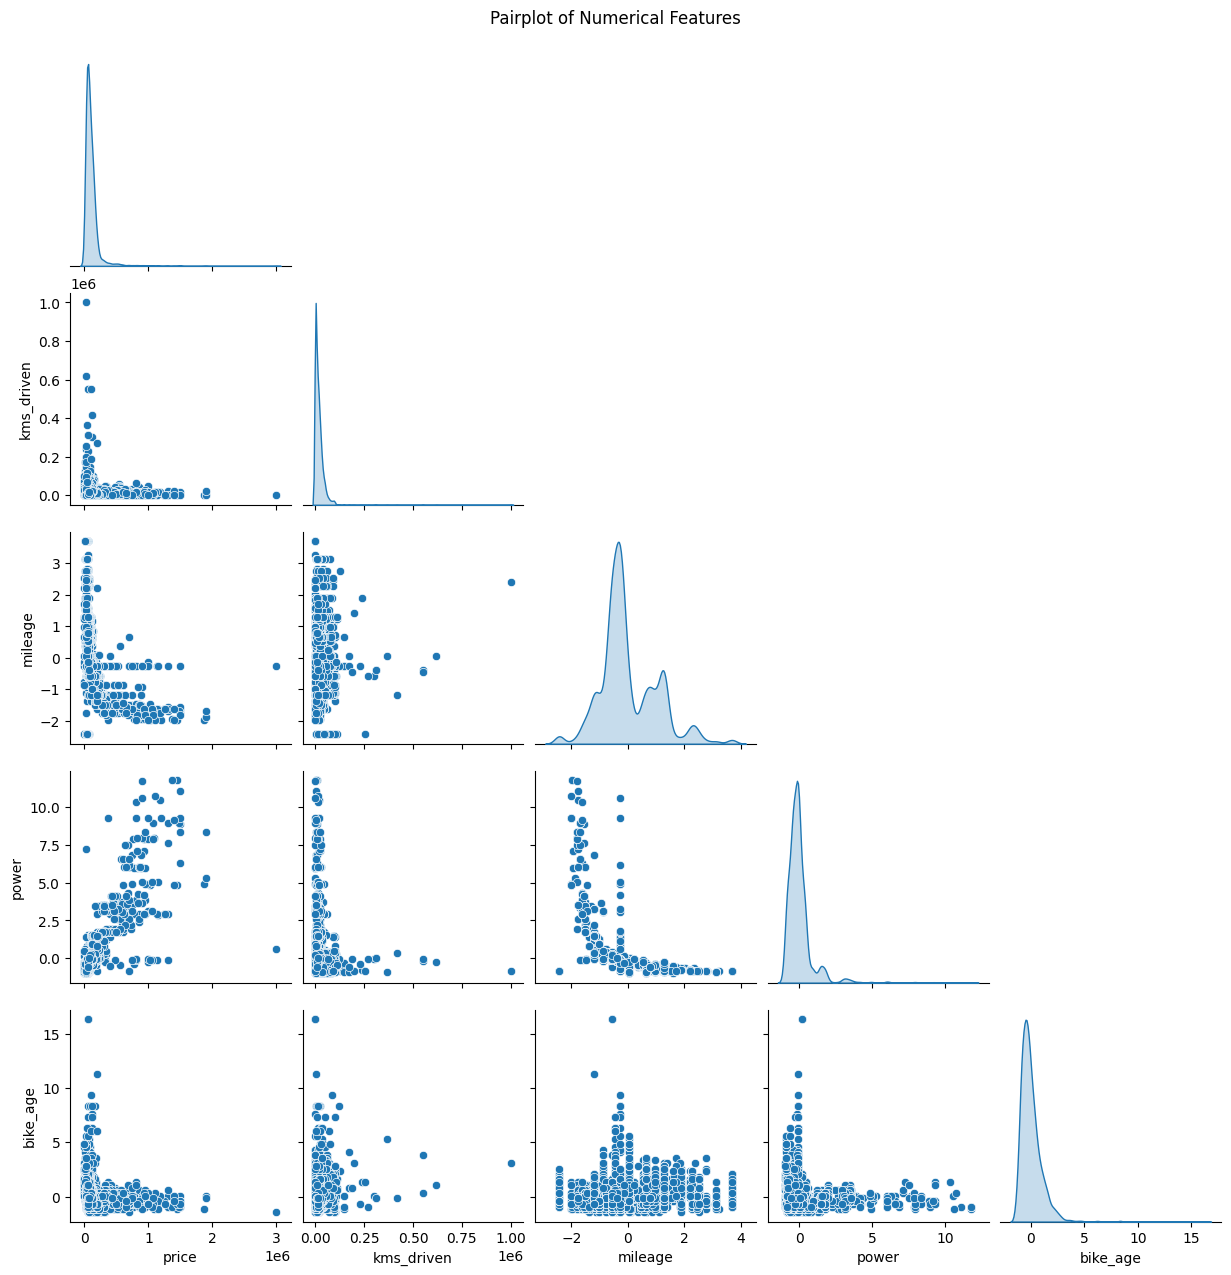

In [255]:
# Select numeric columns for pairplot
num_cols = ['price', 'kms_driven', 'mileage', 'power', 'bike_age']

# Plot pairplot
sns.pairplot(df[num_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

#### Boxplot

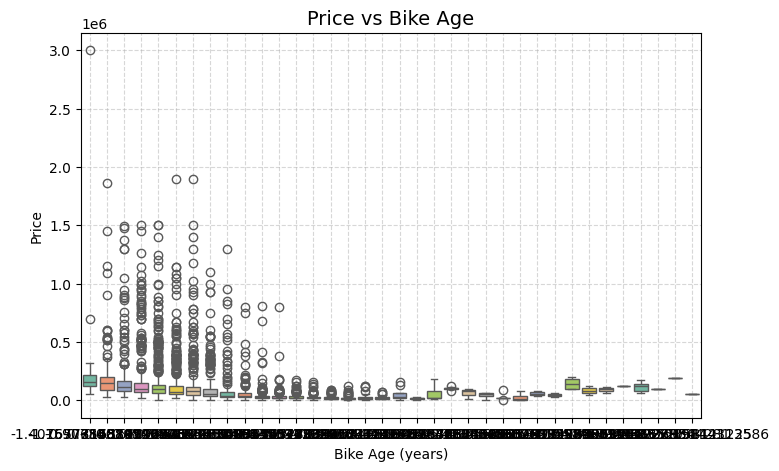

In [256]:
plt.figure(figsize=(8,5))
sns.boxplot(x='bike_age', y='price', data=df, palette='Set2')
plt.title("Price vs Bike Age", fontsize=14)
plt.xlabel("Bike Age (years)")
plt.ylabel("Price")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Geographical Analysis

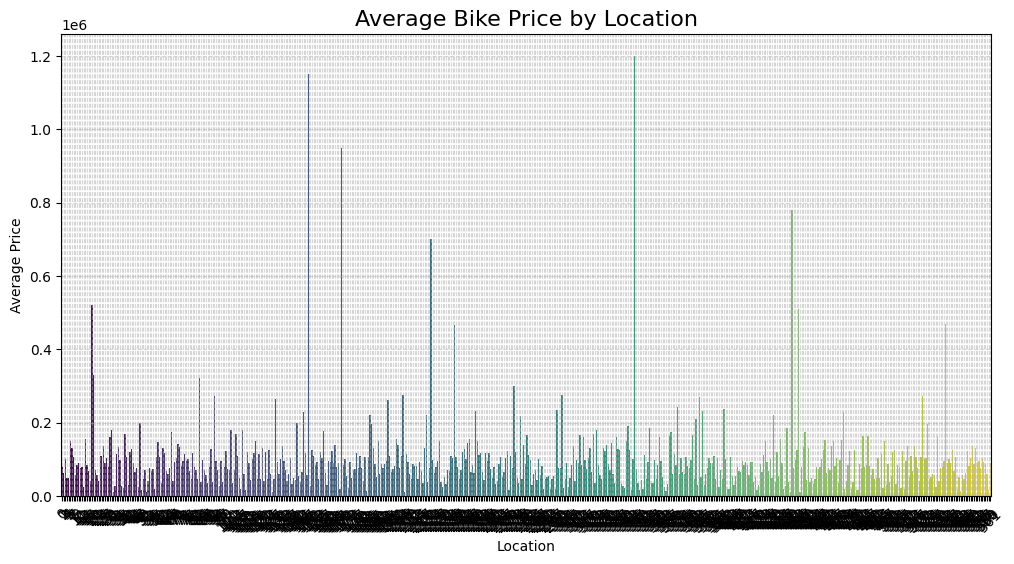

In [257]:
avg_price_location = df.groupby('location')['price'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_location.index, y=avg_price_location.values, palette='viridis')
plt.xticks(rotation=45)
plt.title("Average Bike Price by Location", fontsize=16)
plt.xlabel("Location")
plt.ylabel("Average Price")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Time Series Analysis

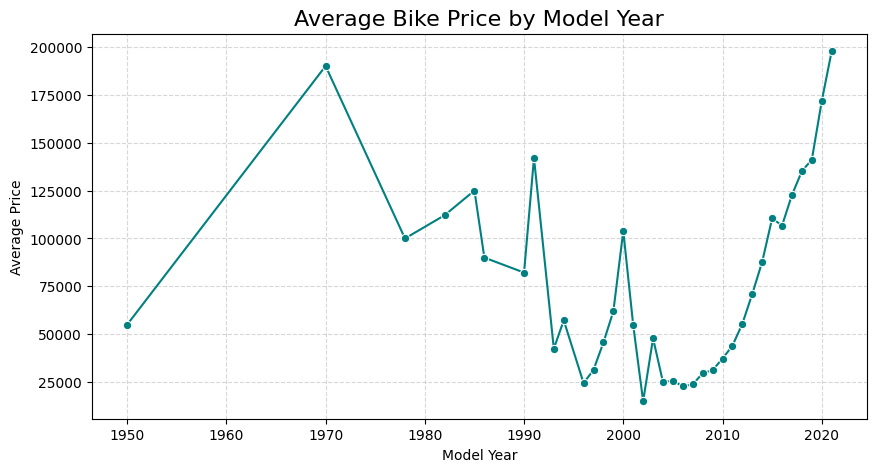

In [258]:
# Group by model_year and calculate average price
avg_price_year = df.groupby('model_year')['price'].mean().reset_index()

# Line plot
plt.figure(figsize=(10,5))
sns.lineplot(x='model_year', y='price', data=avg_price_year, marker='o', color='teal')
plt.title("Average Bike Price by Model Year", fontsize=16)
plt.xlabel("Model Year")
plt.ylabel("Average Price")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [259]:
df2 = df_final.select_dtypes(exclude=['object'])

In [260]:
df2

,model_year,kms_driven,location,mileage,power,price,bike_age,owner_first owner,owner_fourth owner or more,owner_second owner,owner_third owner
0,2017,17000.0,238,35.0,19.0,63500,8,1.0,0.0,0.0,0.0
1,2016,50000.0,238,35.0,19.8,115000,9,1.0,0.0,0.0,0.0
2,2012,14795.0,238,30.0,28.0,300000,13,1.0,0.0,0.0,0.0
3,2017,28.0,428,28.0,34.5,100000,8,1.0,0.0,0.0,0.0
4,2020,2000.0,62,40.0,30.0,197500,5,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
7852,2011,7000.0,8,42.0,16.0,55000,14,1.0,0.0,0.0,0.0
7853,2015,80.0,157,80.0,7.7,28000,10,1.0,0.0,0.0,0.0
7854,2016,6407.0,62,65.0,17.0,61740,9,1.0,0.0,0.0,0.0
7855,2016,7524.0,62,57.0,11.8,49000,9,1.0,0.0,0.0,0.0


In [ ]:
df2['kms_driven'] = df2['kms_driven'].fillna(df2['kms_driven'].median())

In [266]:
skb = SelectKBest(score_func=f_regression, k=25)
y = df2['price']  # continuous target
X = df2.drop('price', axis=1)
# Select top 25 features
X_new = skb.fit_transform(X, y)
# Get selected feature names
selected_features = X.columns[skb.get_support()]
selected_features

Index(['model_year', 'kms_driven', 'location', 'mileage', 'power', 'bike_age',
       'owner_first owner', 'owner_fourth owner or more', 'owner_second owner',
       'owner_third owner'],
      dtype='object')

In [267]:
df2.shape

(7857, 11)

**Feature Selection score of each column**

In [268]:
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': skb.scores_
}).sort_values(by='Score', ascending=False)
feature_scores

,Feature,Score
4,power,15576.936856
3,mileage,1855.214850
0,model_year,430.579218
5,bike_age,430.579218
1,kms_driven,103.594954
6,owner_first owner,12.312949
2,location,9.014806
7,owner_fourth owner or more,7.762842
9,owner_third owner,6.825013
8,owner_second owner,3.586961


In [269]:
X_selected= X[selected_features]
X_selected

,model_year,kms_driven,location,mileage,power,bike_age,owner_first owner,owner_fourth owner or more,owner_second owner,owner_third owner
0,2017,17000.0,238,35.0,19.0,8,1.0,0.0,0.0,0.0
1,2016,50000.0,238,35.0,19.8,9,1.0,0.0,0.0,0.0
2,2012,14795.0,238,30.0,28.0,13,1.0,0.0,0.0,0.0
3,2017,28.0,428,28.0,34.5,8,1.0,0.0,0.0,0.0
4,2020,2000.0,62,40.0,30.0,5,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7852,2011,7000.0,8,42.0,16.0,14,1.0,0.0,0.0,0.0
7853,2015,80.0,157,80.0,7.7,10,1.0,0.0,0.0,0.0
7854,2016,6407.0,62,65.0,17.0,9,1.0,0.0,0.0,0.0
7855,2016,7524.0,62,57.0,11.8,9,1.0,0.0,0.0,0.0


In [270]:
X_selected.to_csv('Featured Data.csv',index= False)

In [271]:
ss= StandardScaler()
X_scaled= ss.fit_transform(X_selected)

### Train, Test , Split

In [272]:
X_train,X_test,y_train,y_test= train_test_split(X_scaled,y,test_size=0.2,random_state=40)

In [273]:
print('X_train :',X_train.shape)
print('X_test :',X_test.shape)
print('y_train:',y_train.shape)
print('y_test :',y_test.shape)

X_train : (6285, 10)
X_test : (1572, 10)
y_train: (6285,)
y_test : (1572,)


In [274]:
y.value_counts()    

price
45000     145
60000     144
120000    133
70000     132
80000     130
         ... 
45131       1
19400       1
136500      1
20300       1
22440       1
Name: count, Length: 1627, dtype: int64

## Machine Learning 

#### Model Building

In [277]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100)
}

In [278]:
metrics = []
for name, model in models.items():            
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    metrics.append({
        "Model": name,
        "MAE": round(mae, 2),                     #Measures average absolute error.
        "MSE": round(mse, 2),                     #Squared version of errors, penalizes large mistakes.
        "RMSE": round(rmse, 2),                   #Square root of MSE
        "R² Score": round(r2, 4)                  #Measures how well the regression explains variance in target.
    })
# Convert to DataFrame for nice display
results_df = pd.DataFrame(metrics)
print(results_df)

               Model       MAE           MSE      RMSE  R² Score
0  Linear Regression  35634.99  4.561626e+09  67539.81    0.6824
1      Decision Tree  21545.19  3.622543e+09  60187.56    0.7478
2      Random Forest  18083.23  2.498406e+09  49984.06    0.8261
3  Gradient Boosting  21292.98  2.490002e+09  49899.92    0.8267


**Best Performing Model: Random Forest Regressor and Gradient Boosting. It has achieved the lowest error across MSE and RMSE and the highest R² score (0.82), indicating almost perfect fit with the data.**

## Hyperparameter Tuning

**Hyperparameter Tuning is done using GridSearch cross validation for RandomForestRegressor**

In [279]:
# Pipeline with scaling with Random forest Regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),      
    ('gbr', RandomForestRegressor(random_state=42))
])

In [280]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [281]:
gridsearch= GridSearchCV(estimator=RandomForestRegressor(),
                         param_grid=param_grid,
                         cv=5,                                   #5-fold cross-validation                  
                         scoring='r2',                     
                         n_jobs= -1,
                         error_score="raise",
                         verbose=1)  

In [282]:
gridsearch.fit(X_train, y_train)                          #fitting

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=1)

In [283]:
print("✅ Best Parameters:", gridsearch.best_params_)      # Best parameters & score
print("🏆 Best R² Score:", gridsearch.best_score_)

✅ Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
🏆 Best R² Score: 0.8094735305917569


In [284]:
best_model= gridsearch.best_estimator_

**This estimator gives the RandomForestRegressor with the best parameters already trained on the full training set.**

In [286]:
y_pred= best_model.predict(X_test)

In [287]:
mae = mean_absolute_error(y_test, y_pred)              # Average absolute difference between actual & predicted
mse = mean_squared_error(y_test, y_pred)               # Average squared difference (penalizes larger errors)
rmse = np.sqrt(mse)                                    # Root of MSE, error in same scale as target
r2 = r2_score(y_test, y_pred)                          # Variance explained by model (0–1 scale)

print(f"\n Evaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.4f}")


 Evaluation Metrics:
MAE       : 18905.77
MSE       : 2458965080.85
RMSE      : 49587.95
R² Score  : 0.8288


**~82% of the variance in price.**

### Creating pipeline

In [288]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),      # Handle missing values (if required)
    ('scaler', StandardScaler()),                       # Feature scaling
    ('model', RandomForestRegressor(random_state=42))  # ML model
])
# Train pipeline
pipeline.fit(X_train, y_train)
# Predict
y_pred = pipeline.predict(X_test)

In [289]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n Evaluation Metrics:")
print(f"MAE       : {mae:.2f}")
print(f"MSE       : {mse:.2f}")
print(f"RMSE      : {rmse:.2f}")
print(f"R² Score  : {r2:.4f}")


 Evaluation Metrics:
MAE       : 17723.63
MSE       : 2330324472.51
RMSE      : 48273.43
R² Score  : 0.8378


### Saving

**saving (serializing) and loading (deserializing) models or objects.**

In [290]:
joblib.dump(pipeline,'Bikes.joblib')

['Bikes.joblib']

In [291]:
loaded_pipeline=joblib.load('Bikes.joblib')

### Predicting unseen data

In [294]:
df_unseen=pd.read_csv('unseen_data.csv')
df_unseen

,model_year,kms_driven,location,mileage,power,bike_age,owner_first owner,owner_fourth owner or more,owner_second owner,owner_third owner,price
0,2017,17000,238,35,19.00,8,1,0,0,0,63500
1,2016,50000,238,35,19.80,9,1,0,0,0,115000
2,2012,14795,238,30,28.00,13,1,0,0,0,300000
3,2017,28,428,28,34.50,8,1,0,0,0,100000
4,2020,2000,62,40,30.00,5,1,0,0,0,197500
5,2012,24561,62,35,25.00,13,0,0,0,1,63400
6,2016,19718,62,65,17.00,9,1,0,0,0,55000
7,2020,40,238,40,20.21,5,1,0,0,0,120000
8,2018,1350,249,25,42.90,7,1,0,0,0,198000
9,2014,58,62,58,13.00,11,1,0,0,0,40000


In [295]:
x_unseen=df_unseen.drop("price", axis=1)         # Features (everything except target)
y_unseen=df_unseen['price']     

**generating predictions for the unseen dataset using the trained pipeline**

In [296]:
y_unseen_pred=loaded_pipeline.predict(x_unseen)  

In [297]:
df_unseen['predicted']=y_unseen_pred

In [ ]:
# Example unseen single row 
unseen_bikes = pd.DataFrame([{
'model_year': 2018,
    'kms_driven': 15000,
    'location': 0,   
    'mileage': 45,
    'power': 15,
    'bike_age': 5,
    'owner_first owner': 1,
    'owner_fourth owner or more': 0,
    'owner_third owner': 0,
    'owner_second owner': 0
    
    }])

# Predict using the trained pipeline
predicted_price = pipeline.predict(unseen_bikes)

print(f"💰 Predicted Price: {predicted_price[0]:.2f}")

### Conclusion

   By Exploratory Data Analysis (EDA) found that newer bikes have higher resale prices; depreciation increases with age and Kms driven is negatively correlated with price (higher usage → lower price).It shows that the location significantly influences price (urban/metro bikes fetch higher resale value) also the first-owner bikes retain the most value; resale price drops sharply from second owner onwards.
   Missing values were imputed using median/mode strategies. New feature such as Bike Age is created, which improved data richness.Noisy values in mileage, power, kms_driven, and converted them into numeric is handled

- Trained regression models (e.g., Random Forest Regressor).
- Achieved good predictive performance (evaluated with MAE, RMSE, R²).
- Predictions on unseen bikes gave reasonable estimates, showing the model generalizes well.

### Future Work

**Advanced Modeling**
Try gradient boosting models (XGBoost, LightGBM, CatBoost) for better accuracy.
Hyperparameter tuning using GridSearchCV/RandomizedSearchCV.
Feature Engineering Improvements
Include additional features such as service history, accident history, and modifications.
Use external datasets (e.g., city average income, petrol price trends, demand indicators) to enrich location data.

**Handling Temporal Effects**

Consider inflation and yearly market trends (price drops over time).
Build models that adjust predictions based on the current year vs. model year.

**Deployment**

Build a streamlit or flask app where users can input bike details and get instant predicted resale value.
Integrate with APIs (e.g., OLX, BikeWale) for real-time prediction services.